# Python Analytics for finance

**Simon Dequidt - EGB short-end repo rates trading desk - Bank of America**

# Table of Contents
- [Python basis: Data types & structures](#Data-types-structures)
- [Retrieve information from files & web](#Retrieve-information-from-files-web)
  - [File handling](#File-handling)
  - [Web scraping](#Web-scraping)
- [Data formatting](#Data-formatting)
  - [Pandas](#Pandas)
  - [Numpy](#Numpy)
  - [Scipy](#Scipy)
- [Visualise your data / results](#Visualise-your-data--results)
  - [Matplotlib](#Matplotlib)
  - [Seaborn](#Seaborn)
- [Machine Learning introduction](#Machine-learning-introduction)
  - [Supervised Learning](#Supervised-learning)
    - [Regression models](#Regression-models)
      - [Linear: univariate, multivariate](#Linear-univariate-multivariate)
    - [Classification models](#Classification-models)
      - [Logistic regression](#Logistic-regression)
      - [K-Nearest Neighbours](#K-nearest-neighbours)
      - [Support Vector Machines (SVM)](#Support-vector-machines-svm)
      - [Decision Trees & Random Forests](#Decision-trees--random-forests)
  - [Unsupervised Learning](#Unsupervised-learning)
    - [Clustering](#Clustering)
      - [K-means](#K-means)
      - [Hierarchical clustering](#Hierarchical-clustering)
    - [Dimensionality reduction](#Dimensionality-reduction)
      - [Principal Components Analysis (PCA)](#Principal-components-analysis-pca)
      - [Autoencoders](#Autoencoders)
  - [Hyperparameters optimisation algoritms](#Hyperparameters-optimisation-algoritms)
- [Data Base Management - SQL with Python](#Data-base-management-sql-with-python)
- [Improve the performances of your code - Introduction to Object-Oriented language](#Object-Oriented-Introduction)
  

In [2]:
#NB : if the links (ToC) do not work, please install the following:
#pip install nbconvert
#!jupyter nbconvert --to html --template toc2 notebook.ipynb

# Data-types-structures

### Types

In [3]:
# int
age = 25

# float 
pi = 3.14

# str
name = "Simon"

# NoneType
result = None

# boolean
is_sunny = True

### Structures

In [4]:
# list
mixed = [1, "hello", 3.14, True]

# tuple 
colors = ('red', 4, None, 3.14)

# dict
student = {'name': 'Simon',
          'age' : 25,
          'grades' : [18,20]}
# set 
unique_numbers = {1, 2, 3, 4, 5}


# Retrieve-information-from-files-web

## File-handling

In [5]:
# open file for 'r': reading/ 'w': writing, 'a': appending, 'b': binary files
#file = open('example.txt', 'r') #'r', 'w', 'a', 'b'
with open('example.txt', 'r') as file:
    content = file.read()
    print(content)

with open('example.txt', 'w') as file:
    file.write("Hello, World!\n")

with open('example.txt', 'a') as file:
    file.write("\nAppending a new line.")
    
# Check if file exists
import os
if os.path.exists('example.txt'):
    print("File exists")
else:
    print("File does not exist")

# Remove a file
os.remove('example.txt')

FileNotFoundError: [Errno 2] No such file or directory: 'example.txt'

In [ ]:
# csv
## read
df = pd.read_csv('example.csv', sep=',', header=0, names=['A', 'B', 'C'], 
                 index_col=0, usecols=['A', 'C'], na_values=['NA'], 
                 parse_dates=['date'])
## write 
df.to_csv('output.csv', index=False)


# excel file
## read
df = pd.read_excel('example.xlsx', sheet_name='Sheet1', header=0, 
                   names=['A', 'B', 'C'], index_col=0, usecols='A:C', 
                   na_values=['NA'], parse_dates=['date'])
## write 
df.to_excel('output.xlsx', index=False)

## Web-scraping

In [1]:
import yfinance as yf

# Define the ticker symbols for US Treasury yields
tickers = {
    '1mo': '^IRX',   # 1 Month Treasury Bill
    '3mo': '^IR3T',  # 3 Month Treasury Bill
    '6mo': '^IR6T',  # 6 Month Treasury Bill
    '1y': '^IR1T',   # 1 Year Treasury Bill
    '2y': '^IR2T',   # 2 Year Treasury Note
    '5y': '^IR5T',   # 5 Year Treasury Note
    '10y': '^TNX',   # 10 Year Treasury Note
    '30y': '^TYX'    # 30 Year Treasury Bond
}

# Fetch current yields
yields = {}
for period, ticker in tickers.items():
    data = yf.Ticker(ticker).history(period='1d')
    if not data.empty:
        yield_value = data['Close'][0]
        yields[period] = yield_value
    else:
        yields[period] = None

# Print the fetched yields
print("Current US Treasury Yields:")
for period, yield_value in yields.items():
    print(f"{period}: {yield_value}%")


^IR3T: No data found, symbol may be delisted
^IR6T: No data found, symbol may be delisted
^IR1T: No data found, symbol may be delisted
^IR2T: No data found, symbol may be delisted
^IR5T: No data found, symbol may be delisted


Current US Treasury Yields:
1mo: 5.230000019073486%
3mo: None%
6mo: None%
1y: None%
2y: None%
5y: None%
10y: 4.355000019073486%
30y: 4.5229997634887695%


## Data Analysis
- Pandas (DataFrame)
- Numpy (Array)
- Scipy (Function, Array)


### Pandas

- DataFrame creation from file
- Basic operations on the DataFrame shape
- Basic operations on the DataFrame values
- Basic dataframe description
- Basic dataframe visualisation (built-in pandas)
- DataFrame manipulation

**libraries**

In [1]:
import pandas as pd

**import data from excel files**

In [2]:
columns_message = ["Time", "Type", "Oder ID", "Size", "Price", "Direction"]
data_message = pd.read_csv("TSLA_2015-01-02_34200000_57600000_message_10.csv", header = None, names = columns_message)
data_message

,Time,Type,Oder ID,Size,Price,Direction
0,34200.006789,5,0,13,2228300,1
1,34200.034290,6,-1,17011,2228700,-1
2,34200.034290,1,5519048,11,2227500,1
3,34200.034290,1,2142274,10,2230000,-1
4,34200.034290,1,2629509,200,2226000,1
...,...,...,...,...,...,...
216706,57599.977910,4,267961846,39,2193100,-1
216707,57599.977910,4,267963915,61,2193100,-1
216708,57599.977975,1,267983787,100,2191900,1
216709,57599.978001,3,267981940,100,2193100,-1


Type:
    - 1: Submission of a new limit order
    - 2: Cancellation (Partial deletion 
       of a limit order)
    - 3: Deletion (Total deletion of a limit order)
    - 4: Execution of a visible limit order			   	 
    - 5: Execution of a hidden limit order
    - 6: Trading halt indicator 				   

In [3]:
columns_orderbook = []
levels = 10  
data_orderbook = pd.read_csv("TSLA_2015-01-02_34200000_57600000_orderbook_10.csv", header = None)

for i in range(1, levels + 1):
    columns_orderbook.extend([f"Ask Price {i}", f"Ask Volume {i}", f"Bid Price {i}", f"Bid Volume {i}"])
data_orderbook.columns = columns_orderbook
data_orderbook

,Ask Price 1,Ask Volume 1,Bid Price 1,Bid Volume 1,Ask Price 2,Ask Volume 2,Bid Price 2,Bid Volume 2,Ask Price 3,Ask Volume 3,...,Bid Price 8,Bid Volume 8,Ask Price 9,Ask Volume 9,Bid Price 9,Bid Volume 9,Ask Price 10,Ask Volume 10,Bid Price 10,Bid Volume 10
0,2229100,1507,2226400,300,2234000,50,2222200,200,2237200,300,...,2203200,100,2252500,20,2200000,97,2257500,40,2190000,50
1,2229100,1507,2226400,300,2234000,50,2222200,200,2237200,300,...,2203200,100,2252500,20,2200000,97,2257500,40,2190000,50
2,2229100,1507,2227500,11,2234000,50,2226400,300,2237200,300,...,2210000,100,2252500,20,2203200,100,2257500,40,2200000,97
3,2229100,1507,2227500,11,2230000,10,2226400,300,2234000,50,...,2210000,100,2250000,100,2203200,100,2252500,20,2200000,97
4,2229100,1507,2227500,11,2230000,10,2226400,300,2234000,50,...,2218300,20,2250000,100,2210000,100,2252500,20,2203200,100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
216706,2193100,600,2191900,1000,2193400,200,2191700,2600,2194100,100,...,2190700,1619,2195800,600,2190600,100,2196000,2200,2190500,200
216707,2193100,539,2191900,1000,2193400,200,2191700,2600,2194100,100,...,2190700,1619,2195800,600,2190600,100,2196000,2200,2190500,200
216708,2193100,539,2191900,1100,2193400,200,2191700,2600,2194100,100,...,2190700,1619,2195800,600,2190600,100,2196000,2200,2190500,200
216709,2193100,439,2191900,1100,2193400,200,2191700,2600,2194100,100,...,2190700,1619,2195800,600,2190600,100,2196000,2200,2190500,200


**basic operations on the DataFrame shape** : 
- df.set_index("colname", inplace = True)
- df.reset_index(inplace = True, drop=True)
- df.drop("columntodrop", axis = 1, inplace=True)
- pd.merge(df1, df2, left_index=True, right_index=True)
- df1.join(df2, how = 'outer')

**basic operations on the DataFrame values** : 
- df.fillna(method = 'ffill'/'bfill', axis = "columns",limit =1)
- df.interpolate(method = ...)
- df.dropna(thresh = 1)
- df["col"].unique()
- df["col"].nunique()
- df.value_counts()
- df.size()
- df.count()
- df.replace(to_replace = [-99999, -88888], value = 0)/if the whole column : df.replace({'col1' : -99999,'col2' : -99999, 'col3' : '0'}, np.nan)     additional parameter : regex=True
- df.sort_values(by='col')
- df.isnull()

*NB:*
- interpolation methods:
    - 'linear': Linear interpolation.
    - 'polynomial': Polynomial interpolation.
    - 'spline': Spline interpolation.
    - 'nearest': Nearest value interpolation.
    - 'time': Time interpolation (works on datetime-like indices).

In [4]:
data = pd.merge(data_message, data_orderbook, left_index=True, right_index=True)
data

,Time,Type,Oder ID,Size,Price,Direction,Ask Price 1,Ask Volume 1,Bid Price 1,Bid Volume 1,...,Bid Price 8,Bid Volume 8,Ask Price 9,Ask Volume 9,Bid Price 9,Bid Volume 9,Ask Price 10,Ask Volume 10,Bid Price 10,Bid Volume 10
0,34200.006789,5,0,13,2228300,1,2229100,1507,2226400,300,...,2203200,100,2252500,20,2200000,97,2257500,40,2190000,50
1,34200.034290,6,-1,17011,2228700,-1,2229100,1507,2226400,300,...,2203200,100,2252500,20,2200000,97,2257500,40,2190000,50
2,34200.034290,1,5519048,11,2227500,1,2229100,1507,2227500,11,...,2210000,100,2252500,20,2203200,100,2257500,40,2200000,97
3,34200.034290,1,2142274,10,2230000,-1,2229100,1507,2227500,11,...,2210000,100,2250000,100,2203200,100,2252500,20,2200000,97
4,34200.034290,1,2629509,200,2226000,1,2229100,1507,2227500,11,...,2218300,20,2250000,100,2210000,100,2252500,20,2203200,100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
216706,57599.977910,4,267961846,39,2193100,-1,2193100,600,2191900,1000,...,2190700,1619,2195800,600,2190600,100,2196000,2200,2190500,200
216707,57599.977910,4,267963915,61,2193100,-1,2193100,539,2191900,1000,...,2190700,1619,2195800,600,2190600,100,2196000,2200,2190500,200
216708,57599.977975,1,267983787,100,2191900,1,2193100,539,2191900,1100,...,2190700,1619,2195800,600,2190600,100,2196000,2200,2190500,200
216709,57599.978001,3,267981940,100,2193100,-1,2193100,439,2191900,1100,...,2190700,1619,2195800,600,2190600,100,2196000,2200,2190500,200


**basic dataframe description** : 
- df.head()
- df.tail()
- df.describe()
- df.info()
- df.min()
- df.max()
- df.mean()


**basic dataframe visualisation (built-in pandas)** : 
- df.plot.area
- df.plot.barh
- df.plot.density
- df.plot.hist
- df.plot.line
- df.plot.scatter
- df.plot.bar
- df.plot.box
- df.plot.hexbin
- df.plot.kde
- df.plot.pie

**dataframe manipulation**
- groupby
- Pivot basics : 
    - pivot : df.pivot(index='col1',columns='col2', values = 'col3')
    - pivot_table : df.pivot_table(values='D',index=['A', 'B'],columns=['C'], margins=True, aggfunc=np.sum)
    - grouper : 
df['date'] = pd.to_datetime(df['date']) \
df.pivot_table(index=pd.Grouper(freq='M',key='date'),columns='col1')
  
- filter :  df[df["col"].str.contains("charactertofind", case = False)]

- Melt :  pd.melt(df, id_vars=["Time"], var_name='col1', value_name='col2')
- Stack/unstack : df.stack(level=0) / df.unstack()
- Crosstab : pd.crosstab(df.col1, df.col2)
- DateTimeIndex
- Date Range
- Handling holidays
- DateTime
- Handling Time Zones

**groupby**

In [5]:
data_direction = data.groupby(["Direction", "Type"])
data_direction["Size"].sum()

Direction  Type
-1         1       4488714
           2          5670
           3       4081727
           4        327250
           6         17011
 1         1       5663144
           2          3410
           3       5273476
           4        344110
           5        254549
Name: Size, dtype: int64

In [6]:
def grouper(df, idx, col):
    if 1500 <= df[col].loc[idx] <= 2000:
        return '1500-2000'
    elif 1000 <= df[col].loc[idx] <= 1500:
        return '1000-1500'
    elif 500 <= df[col].loc[idx] <= 1000:
        return '500-1000'
    else:
        return 'others'

In [7]:
data_volume = data.groupby(lambda x: grouper(data, x, 'Size'))
for key, d in data_volume:
    print("Group by Key: {}\n".format(key))
    print(d)

Group by Key: 1000-1500

                Time  Type    Oder ID  Size    Price  Direction  Ask Price 1  \
864     34550.571240     1   12968507  1200  2211100          1      2218700   
887     34560.404750     1   13127667  1100  2211800          1      2218700   
888     34560.406205     3   12968507  1200  2211100          1      2218700   
922     34569.970659     1   13278550  1100  2212000          1      2219400   
923     34569.970683     3   13127667  1100  2211800          1      2219400   
...              ...   ...        ...   ...      ...        ...          ...   
215291  57549.404346     4  265613308  1000  2194200         -1      2194200   
215886  57571.754285     1  266989750  1100  2190700          1      2193200   
216117  57578.021238     3  266989750  1100  2190700          1      2193900   
216633  57599.011791     1  267927013  1000  2191300          1      2195300   
216634  57599.011819     1  267927017  1000  2196200         -1      2195300   

        Ask Vo

**crosstab**

In [8]:
pd.crosstab(data.Type, data.Direction, margins = True)

Direction,-1,1,All
Type,,,
1,46243,59918,106161
2,21,26,47
3,42543,56472,99015
4,3865,3878,7743
5,0,3744,3744
6,1,0,1
All,92673,124038,216711


- Multi Index Column and Rows: 
pd.crosstab(df.col1, [df.col2,df.col3], margins=True)
- Normalize:
pd.crosstab(df.col1, df.col2, normalize='index')
- Aggfunc and Values:
pd.crosstab(df.col1, df.col2, values=df.col3, aggfunc=np.average)

**Date range**
- Finding missing dates from datetimeindex
- Generating DatetimeIndex with periods argument

In [9]:
#finding missing dates from datetimeindex
daily_index = pd.date_range(start="6/1/2016",end="6/30/2016",freq='D')
daily_index.difference(data.index)

DatetimeIndex(['2016-06-01', '2016-06-02', '2016-06-03', '2016-06-04',
               '2016-06-05', '2016-06-06', '2016-06-07', '2016-06-08',
               '2016-06-09', '2016-06-10', '2016-06-11', '2016-06-12',
               '2016-06-13', '2016-06-14', '2016-06-15', '2016-06-16',
               '2016-06-17', '2016-06-18', '2016-06-19', '2016-06-20',
               '2016-06-21', '2016-06-22', '2016-06-23', '2016-06-24',
               '2016-06-25', '2016-06-26', '2016-06-27', '2016-06-28',
               '2016-06-29', '2016-06-30'],
              dtype='datetime64[ns]', freq='D')

In [10]:
date_rng = pd.date_range(start='2023-01-01', end='2023-01-10', freq='D')
df = pd.DataFrame(date_rng, columns=['date'])
df['data'] = range(1, len(df) + 1)
df.set_index('date', inplace=True)

#To change the frequency
#df.asfreq('H',method='pad')
#df.asfreq('D',method='pad')
#df.asfreq('B',method='pad')
#df.asfreq('W',method='pad')

In [11]:
#generating DatetimeIndex with periods argument
import numpy as np
rng = pd.date_range(start="6/1/2016",end="6/30/2016",freq='H')
ts = pd.Series(np.random.randint(0,10,len(rng)), index=rng)
ts.head(20)

2016-06-01 00:00:00    5
2016-06-01 01:00:00    4
2016-06-01 02:00:00    7
2016-06-01 03:00:00    6
2016-06-01 04:00:00    4
2016-06-01 05:00:00    2
2016-06-01 06:00:00    0
2016-06-01 07:00:00    1
2016-06-01 08:00:00    9
2016-06-01 09:00:00    6
2016-06-01 10:00:00    0
2016-06-01 11:00:00    3
2016-06-01 12:00:00    3
2016-06-01 13:00:00    6
2016-06-01 14:00:00    7
2016-06-01 15:00:00    4
2016-06-01 16:00:00    6
2016-06-01 17:00:00    1
2016-06-01 18:00:00    4
2016-06-01 19:00:00    3
Freq: H, dtype: int64

**Handling holidays**

Using 'B' frequency is not going to help because 4th July was holiday and 'B' is not taking that into account. It only accounts for weekends.
- AbstractHolidayCalendar : class which is used to define custom holiday calendars
- CustomBusinessDay : to generate US holidays calendar frequency

In [12]:
#AbstractHolidayCalendar
from pandas.tseries.holiday import AbstractHolidayCalendar, Holiday, nearest_workday

# Define a custom holiday calendar
class MyHolidayCalendar(AbstractHolidayCalendar):
    rules = [
        Holiday('New Year', month=1, day=1, observance=nearest_workday),
        Holiday('Independence Day', month=7, day=4, observance=nearest_workday),
        Holiday('Christmas', month=12, day=25, observance=nearest_workday)
    ]

# Instantiate the custom calendar
my_cal = MyHolidayCalendar()
# Generate a range of dates
date_range = pd.date_range(start='2024-01-01', end='2024-12-31', freq='B')  # Business days in 2024
# Adjust the dates for holidays using the custom calendar
adjusted_dates = my_cal.holidays(start='2024-01-01', end='2024-12-31')


print(f"Holidays in 2024: {adjusted_dates}")
df = pd.DataFrame({'Business Days': date_range})
df['Is Holiday'] = df['Business Days'].isin(adjusted_dates)
print(df.head(10)) 


Holidays in 2024: DatetimeIndex(['2024-01-01', '2024-07-04', '2024-12-25'], dtype='datetime64[ns]', freq=None)
  Business Days  Is Holiday
0    2024-01-01        True
1    2024-01-02       False
2    2024-01-03       False
3    2024-01-04       False
4    2024-01-05       False
5    2024-01-08       False
6    2024-01-09       False
7    2024-01-10       False
8    2024-01-11       False
9    2024-01-12       False


In [13]:
#CustomBusinessDay
from pandas.tseries.offsets import CustomBusinessDay

egypt_weekdays = "Sun Mon Tue Wed Thu"
b = CustomBusinessDay(weekmask=egypt_weekdays)
pd.date_range(start="7/1/2017",periods=20,freq=b)

DatetimeIndex(['2017-07-02', '2017-07-03', '2017-07-04', '2017-07-05',
               '2017-07-06', '2017-07-09', '2017-07-10', '2017-07-11',
               '2017-07-12', '2017-07-13', '2017-07-16', '2017-07-17',
               '2017-07-18', '2017-07-19', '2017-07-20', '2017-07-23',
               '2017-07-24', '2017-07-25', '2017-07-26', '2017-07-27'],
              dtype='datetime64[ns]', freq='C')

**Datetime**
- Custom
- Invalid dates

In [14]:
dates = ['2017-01-05', 'Jan 5, 2017', '01/05/2017', '2017.01.05', '2017/01/05','20170105']
dt = ['2017-01-05 2:30:00 PM', 'Jan 5, 2017 14:30:00', '01/05/2016', '2017.01.05', '2017/01/05','20170105']
pd.to_datetime(dt)

<ipython-input-14-93fb574637d8>:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pd.to_datetime(dt)


DatetimeIndex(['2017-01-05 14:30:00', '2017-01-05 14:30:00',
               '2016-01-05 00:00:00', '2017-01-05 00:00:00',
               '2017-01-05 00:00:00', '2017-01-05 00:00:00'],
              dtype='datetime64[ns]', freq=None)

In [15]:
# Custom
pd.to_datetime('2017#01#05', format='%Y#%m#%d')

Timestamp('2017-01-05 00:00:00')

In [16]:
# Handling invalid dates
pd.to_datetime(['2017-01-05', 'Jan 6, 2017', 'abc'], errors='ignore')
pd.to_datetime(['2017-01-05', 'Jan 6, 2017', 'abc'], errors='coerce')
#.strftime('%Y-%m-%d')[0]

DatetimeIndex(['2017-01-05', 'NaT', 'NaT'], dtype='datetime64[ns]', freq=None)

**Handling Time Zones**

In [17]:
from pytz import all_timezones

In [18]:
#df.tz_localize(tz='US/Eastern')
#df = df.tz_convert('Europe/Berlin')
#df.tz_localize(tz='Europe/Berlin')
#df.index = df.index.tz_convert('Asia/Calcutta') 

### Numpy 
- Array
- Basic Operations on array
- Statistical functions
- Handling Missing Data
- Generating Random Numbers
- Histogram and Bin Count

**library**

In [19]:
import numpy as np

**Array**

In [20]:
# Create a 1D array
arr1 = np.array([1, 2, 3, 4, 5])

# Create a 2D array
arr2 = np.array([[1, 2, 3], [4, 5, 6]])

# Create an array of zeros
zeros = np.zeros((3, 3))

# Create an array of ones
ones = np.ones((2, 4))

# Create an array with a range of values
range_arr = np.arange(0, 10, 2)

# Create an array with values spaced evenly on a log scale
logspace_arr = np.logspace(0, 3, 4)

# Create an array of equal distance between points
np.linspace(-100, 100, 100)

array([-100.        ,  -97.97979798,  -95.95959596,  -93.93939394,
        -91.91919192,  -89.8989899 ,  -87.87878788,  -85.85858586,
        -83.83838384,  -81.81818182,  -79.7979798 ,  -77.77777778,
        -75.75757576,  -73.73737374,  -71.71717172,  -69.6969697 ,
        -67.67676768,  -65.65656566,  -63.63636364,  -61.61616162,
        -59.5959596 ,  -57.57575758,  -55.55555556,  -53.53535354,
        -51.51515152,  -49.49494949,  -47.47474747,  -45.45454545,
        -43.43434343,  -41.41414141,  -39.39393939,  -37.37373737,
        -35.35353535,  -33.33333333,  -31.31313131,  -29.29292929,
        -27.27272727,  -25.25252525,  -23.23232323,  -21.21212121,
        -19.19191919,  -17.17171717,  -15.15151515,  -13.13131313,
        -11.11111111,   -9.09090909,   -7.07070707,   -5.05050505,
         -3.03030303,   -1.01010101,    1.01010101,    3.03030303,
          5.05050505,    7.07070707,    9.09090909,   11.11111111,
         13.13131313,   15.15151515,   17.17171717,   19.19191

**Basic Operations**

In [29]:
# Basic Operations

# Element-wise addition
arr_sum = arr1 + 5

# Element-wise multiplication
arr_mul = arr1 * 2

# Element-wise square root
arr_sqrt = np.sqrt(arr1)

# Dot product of two arrays
dot_product = np.dot(arr1, np.array([2, 2, 2, 2, 2]))

In [30]:
# Linear Algebra

# Matrix multiplication
mat1 = np.array([[1, 2], [3, 4]])
mat2 = np.array([[5, 6], [7, 8]])
mat_mul = np.matmul(mat1, mat2)

# Inverse of a matrix
mat_inv = np.linalg.inv(mat1)

# Eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(mat1)

In [31]:
# Operation on array

# Reshape an array
reshaped_arr = np.reshape(arr2, (3, 2))

# Transpose an array
transposed_arr = np.transpose(arr2)

# Flatten an array
flattened_arr = arr2.flatten()

# Concatenate arrays
concatenated_arr = np.concatenate((arr1, np.array([6, 7, 8])))


**Statistics**


- np.mean(a, axis=None, dtype=None, out=None, keepdims=False)
- np.median(a, axis=None, out=None, overwrite_input=False, keepdims=False)
- np.std(a, axis=None, dtype=None, out=None, ddof=0, keepdims=False)
- np.var(a, axis=None, dtype=None, out=None, ddof=0, keepdims=False)
- np.percentile(a, q, axis=None, out=None, overwrite_input=False, -interpolation='linear', keepdims=False)
- np.quantile(a, q, axis=None, out=None, overwrite_input=False, -interpolation='linear', keepdims=False)
- np.corrcoef(x, y=None, rowvar=True, bias=<no value>, ddof=<no value>) - np.cov(m, y=None, rowvar=True, bias=False, ddof=None, fweights=None, aweights=None)
- np.histogram(a, bins=10, range=None, normed=None, weights=None, density=None)
- np.bincount(x, weights=None, minlength=0)

**Handling missing data**

In [32]:
# Create an array with NaN values
arr_with_nan = np.array([1, 2, np.nan, 4, 5])

# Check for NaN values
nan_mask = np.isnan(arr_with_nan)

# Replace NaN values with a specific value
arr_filled = np.nan_to_num(arr_with_nan, nan=0.0)

**Generating Random Numbers**

In [33]:
# Generate an array of random integers
random_ints = np.random.randint(0, 10, size=5)

# Generate an array of random floats
random_floats = np.random.random(size=5)

# Generate a random sample from a normal distribution
normal_sample = np.random.normal(loc=0.0, scale=1.0, size=5)

**Histogram and Bin Count**

In [34]:
# Compute histogram
data_ = np.array([1, 2, 2, 3, 4, 4, 4, 5])
hist, bin_edges = np.histogram(data_, bins=4)

# Bin count
bin_count = np.bincount(data_)

### Scipy

- Optimization (scipy.optimize)
- Statistical Functions (scipy.stats)
- Signal Processing (scipy.signal)
- Linear Algebra (scipy.linalg)
- Integration (scipy.integrate)

In [35]:
from scipy import stats

**Optimization (scipy.optimize)**

In [36]:
from scipy.optimize import minimize

def func(x):
    return (x - 3)**2

# Perform the optimization
x0 = 0 # Initial guess
result = minimize(func, x0)
print(result)

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 2.5388963550532293e-16
        x: [ 3.000e+00]
      nit: 2
      jac: [-1.697e-08]
 hess_inv: [[ 5.000e-01]]
     nfev: 6
     njev: 3


**Statistical Functions (scipy.stats)**

In [37]:
from scipy import stats

datas = np.array([2, 4, 6, 8, 10, 12, 14])
mean = np.mean(datas)
median = np.median(datas)
mode = stats.mode(datas)

print("Mean:", mean)
print("Median:", median)
print("Mode:", mode.mode[0])

Mean: 8.0
Median: 8.0
Mode: 2


<ipython-input-37-82ca8a9aa46b>:6: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode = stats.mode(datas)


**Signal Processing (scipy.signal)**

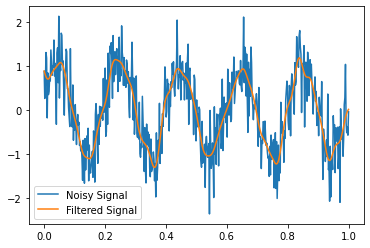

In [38]:
from scipy import signal
import matplotlib
import matplotlib.pyplot as plt

#Generate a noisy signal
np.random.seed(0)
time = np.linspace(0, 1, 500)
noisy_signal = np.sin(2 * np.pi * 5 * time) + np.random.normal(0, 0.5, time.shape)

# Design a low-pass filter
b, a = signal.butter(4, 0.1)

# Apply the filter
filtered_signal = signal.filtfilt(b, a, noisy_signal)

# Plot the results
plt.plot(time, noisy_signal, label='Noisy Signal')
plt.plot(time, filtered_signal, label='Filtered Signal')
plt.legend()
plt.show()

**Linear Algebra (scipy.linalg)**

In [39]:
from scipy import linalg
# Coefficient matrix
A = np.array([[3, 2], [1, 4]])

# Right-hand side vector
b = np.array([5, 6])

# Solve the system
x = linalg.solve(A, b)

print("Solution to the system:", x)

Solution to the system: [0.8 1.3]


**Integration (scipy.integrate)**

In [40]:
from scipy import integrate
# Define a function to integrate
def f(x):
    return x**2

# Integrate the function from 0 to 1
result, error = integrate.quad(f, 0, 1)

print("Integral result:", round(result,3))
print("Estimated error:", error)

Integral result: 0.333
Estimated error: 3.700743415417189e-15


## Visualise-your-data--results
- Matplotlib
- Seaborn

### Matplotlib

In [41]:
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams["figure.figsize"] = 10,8

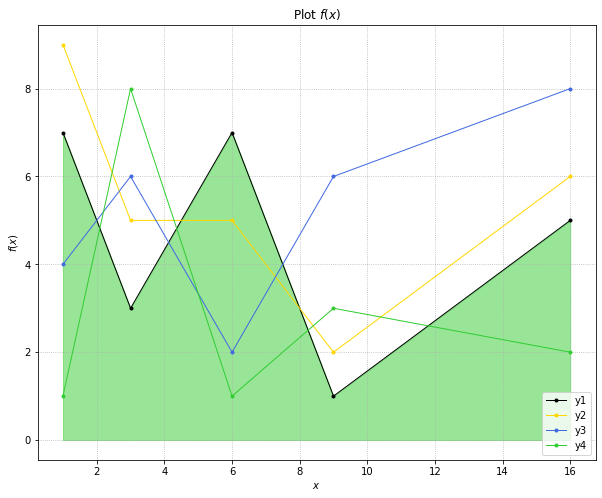

In [42]:
# single figure plot - 2D

x = np.array([1, 3, 6, 9, 16])
y = np.array([7, 3, 7, 1, 5])
y2 = np.array([9, 5, 5, 2, 6])
y3 = np.array([4., 6., 2., 6., 8.])
y4 = np.array([1, 8, 1, 3, 2])

plt.title("Plot $ f(x)$")
plt.plot(x, y,  '.-', label = "y1",color = 'black', linewidth=1)
plt.plot(x, y2,  '.-',color = 'gold', linewidth=1, label = "y2")
plt.plot(x, y3,  '.-',color = 'royalblue', linewidth=1, label  = "y3")
plt.plot(x, y4,  '.-',color = 'limegreen', linewidth=1, label = "y4")

plt.fill_between(x, y, color="limegreen",  alpha=.5)

plt.grid(linestyle=':')
plt.xlabel("$x$")
plt.ylabel("$f(x)$")
plt.legend()

#filename = "exercise3_plot.png"
#plt.savefig(filename)
plt.show()


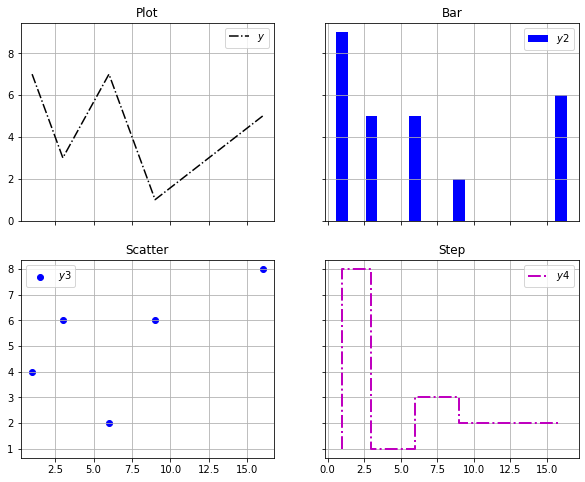

In [43]:
# Multiple figure plots - 2D

fig, ax = plt.subplots(2, 2, sharex="col", sharey="row", figsize=(10, 8))

ax[0, 0].plot(x, y, 'k-.', label="$y$")
ax[0, 0].set_title('Plot')
ax[0, 0].legend()
ax[0, 0].grid()

ax[0, 1].bar(x, y2, color='b', label="$y2$")
ax[0, 1].set_title('Bar')
ax[0, 1].legend()
ax[0, 1].grid()

ax[1, 0].scatter(x, y3, color='b', label="$y3$")
ax[1, 0].set_title("Scatter")
ax[1, 0].legend()
ax[1, 0].grid()

ax[1, 1].step(x, y4, 'm-.', label="$y4$", lw=2)
ax[1, 1].set_title("Step")
ax[1, 1].legend()
ax[1, 1].grid()

plt.show()

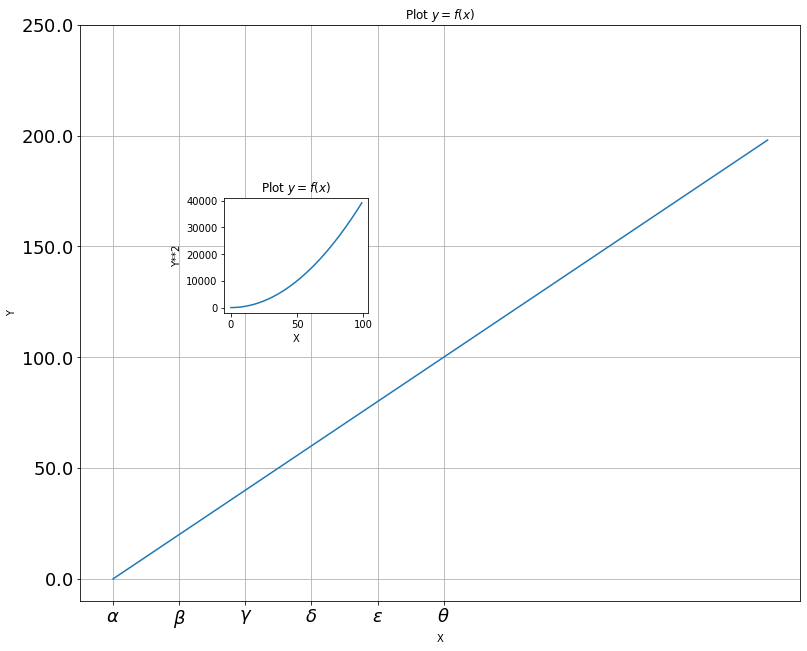

In [44]:
# multiple figures in a single plot - 2D
x = np.arange(0,100)
y = x*2
z = x**2

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.plot(x,y)
ax.grid()
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title('Plot $y = f(x)$')

ax2 = fig.add_axes([0.2,0.5,0.2,0.2])
ax2.plot(x,y**2)
ax2.set_xlabel("X")
ax2.set_ylabel("Y**2")
ax2.set_title('Plot $y = f(x)$')


# Adjust label for non-numeric axis 
ax.set_xticks([0, 10, 20, 30, 40, 50])
ax.set_xticklabels([r'$\alpha$', r'$\beta$', r'$\gamma$', r'$\delta$', r'$\epsilon$', r'$\theta$'], fontsize=18)

yticks = [0, 50, 100, 150, 200, 250]
ax.set_yticks(yticks)
ax.set_yticklabels(["$%.1f$" % y for y in yticks], fontsize=18); # use LaTeX formatted labels


plt.show()

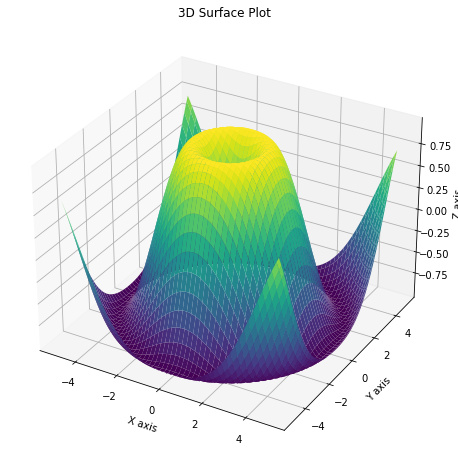

In [45]:
# single figure - 3D
from mpl_toolkits.mplot3d import Axes3D

# Create a grid of points in the x-y plane
x = np.linspace(-5,5, 100)
y = np.linspace(-5,5, 100)
x, y = np.meshgrid(x,y)
# Compute z values based on a function of x and y
z = np.sin(np.sqrt(x**2 + y**2))

# Create the figure
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')

# Plot the surface
ax.plot_surface(x, y, z, cmap ='viridis')
ax.set_title('3D Surface Plot')
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')

# Display the plot
plt.show()


# Optional - Interactive graph

#pip install ipympl ipywidgets
from mpl_toolkits.mplot3d import Axes3D
import ipywidgets as widgets
from ipywidgets import interact
%matplotlib widget

def generate_data(frequency):
    x = np.linspace(-5, 5, 100)
    y = np.linspace(-5, 5, 100)
    x, y = np.meshgrid(x, y)
    z = np.sin(frequency * np.sqrt(x**2 + y**2))
    return x, y, z

def plot_surface(frequency):
    x, y, z = generate_data(frequency)
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(x, y, z, cmap='viridis')
    ax.set_title('Interactive 3D Surface Plot')
    ax.set_xlabel('X axis')
    ax.set_ylabel('Y axis')
    ax.set_zlabel('Z axis')
    plt.show()
    
interact(plot_surface, frequency=widgets.FloatSlider(value=1, min=0.1, max=5, step=0.1, description='Frequency:'))

## Seaborn
- Distributions

- Categorical

- Grid

In [46]:
import seaborn as sns

Distributions
- univariate plot :
     - distplot.
     - rugplot: a dash mark for every point on a univariate distribution. They are the building block of a KDE plot.
     - kdeplot: replace every single observation with a Gaussian (Normal) distribution centered around that value.
- bivariate plot : 
     - jointplot:  kind parameters to compare with : “scatter”, “reg”, “resid”, “kde”, “hex”.
     - pairplot: bivariate plot for all quantitative variable of the DF, add categorical variable as color hue argument .
     - heatmap
     - clustermap


*Univariate plot*

<ipython-input-47-6a3a4da52681>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Price'], kde = True, bins = 20);


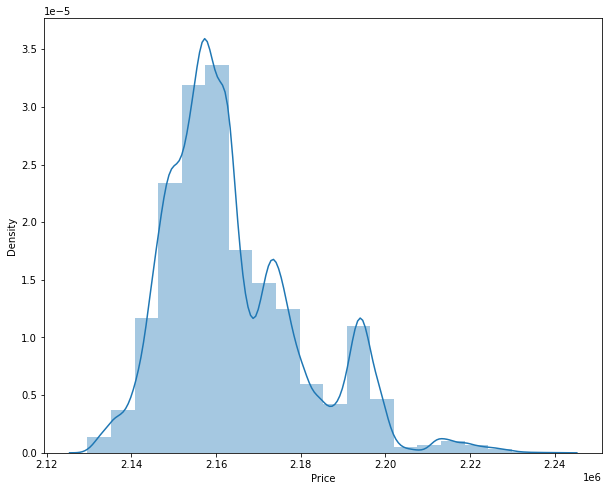

In [47]:
#distplot
sns.distplot(data['Price'], kde = True, bins = 20);

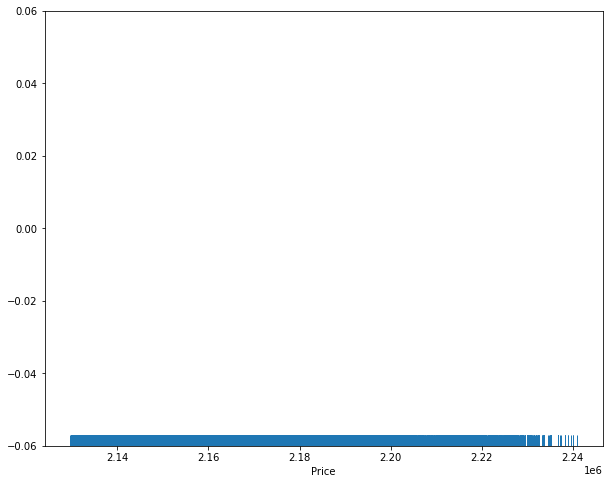

In [48]:
#rugplot
sns.rugplot(data['Price']);

KeyboardInterrupt: 

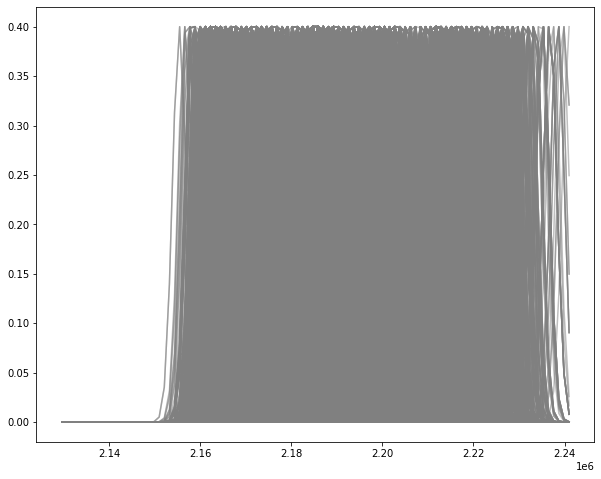

In [49]:
#kdeplot

# Set up the x-axis for the plot
x_min = data['Price'].min() - 1
x_max = data['Price'].max() + 1

# 100 equally spaced points from x_min to x_max
x_axis = np.linspace(x_min,x_max,100)

# Set up the bandwidth, for info on this:
url = 'http://en.wikipedia.org/wiki/Kernel_density_estimation#Practical_estimation_of_the_bandwidth'

bandwidth = ((4*data['Price'].std()**5)/(3*len(data['Price'])))**.2


# Create an empty kernel list
kernel_list = []

# Plot each basis function
for data_point in data['Price']:
    
    # Create a kernel for each point and append to list
    kernel = stats.norm(data_point,bandwidth).pdf(x_axis)
    kernel_list.append(kernel)
    
    #Scale for plotting
    kernel = kernel / kernel.max()
    kernel = kernel * .4
    plt.plot(x_axis,kernel,color = 'grey',alpha=0.5)

plt.ylim(0,1)

In [ ]:
sum_of_kde = np.sum(kernel_list,axis=0)

# Plot figure
fig = plt.plot(x_axis,sum_of_kde,color='indianred')

# Add the initial rugplot
sns.rugplot(data['Price'],c = 'indianred')

# Get rid of y-tick marks
plt.yticks([])

# Set title
plt.suptitle("Sum of the Basis Functions");

*Bivariate plot*

In [ ]:
#jointplot
sns.jointplot(x='Price',y='Size',data=data,kind='reg');

In [ ]:
#pairplot
sns.pairplot(data, hue = 'Direction', palette = 'coolwarm');

In [ ]:
#heatmap
sns.heatmap(data.select_dtypes(include=['number']).corr(),  cmap='magma',linecolor='white',linewidths=1);

# to see where are the missing values
#sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')


In [ ]:
#sns.clustermap(data.pivot_table(values ='Price',index = 'Type', columns = 'year'), cmap = 'coolwarm',standard_scale=1);

Categorical 
- catplot
- boxplot ->The box shows the quartiles of the dataset while the whiskers extend to show the rest of the distribution, except for points that are determined to be “outliers” using a method that is a function of the inter-quartile range.
- violinplot
- stripplot : all observations along with some representation of the underlying distribution.
- swarmplot -> The swarmplot is similar to stripplot(), but the points are adjusted (only along the categorical axis) so that they don’t overlap.
- barplot -> aggregate the categorical data based off some function
- countplot

In [ ]:
sns.catplot(x="Type", y="Price", hue="Direction", kind="bar", data=data)

In [ ]:
# default estimator : mean
#sns.barplot(x='Direction',y='Price',data=data);
sns.barplot(x='Direction',y='Price',data=data, estimator = np.std);

In [ ]:
sns.countplot(x = 'Direction', data = data);

In [ ]:
sns.boxplot(x="Type", y="Price", hue = 'Direction', data=data, palette = 'coolwarm');

In [ ]:
sns.boxplot(data=data, palette = 'rainbow', orient = 'h');

In [ ]:
sns.violinplot(x = 'Type', y = 'Price',hue = 'Direction', data = data, split=True, palette = 'coolwarm')

In [ ]:
sns.stripplot(x = 'Type', y = 'Price',hue = 'Direction', data = data, jitter = False, palette='rainbow');

In [ ]:
sns.swarmplot(x = 'Type', y = 'Price',hue = 'Direction', data = data, palette = 'Set1')


In [ ]:
sns.violinplot(x = 'Type', y = 'Price', data = data,palette='rainbow')
sns.swarmplot(x = 'Type', y = 'Price', data = data,color='black',size=3);

Grid

In [ ]:
g = sns.PairGrid(data)
g.map_diag(plt.hist)
g.map_upper(scatter)
g.map_lower(sns.kdeplot)

In [ ]:
v = sns.FacetGrid(data, col="Type", row="Direction")# hue = 'sex')
v = v.map(plt.scatter, "Price", 'Time').add_legend();

# Machine-learning-introduction

## Supervised-learning

### Regression-models

#### Linear-univariate-multivariate

Hypothesis for Linear Regression :
1. Linearity between dependant variables and independant
2. Non-collinearity of the independant variables
3. Independance: the residuals are not correlated
4. Homoscedasticity: the residuals have constant variance at every level of the independent variable(s)
5. Normality of Residuals: The residuals of the model are normally distributed

Tests to ensure the validity of the hypothesis :
1. Plot (scatter) dependant against independant variables
2. VIF for each independant variables (>10:high correlation)/Correlation matrix
    - from statsmodels.stats.outliers_influence import variance_inflation_factor
3. Durbin-Watson : autocorrelation in the residuals
4. Breusch-Pagan's test/White's test/Residuals  plot against fitted values
    - from statsmodels.stats.diagnostic import het_breuschpagan, linear_rainbow
5. Histogram and Q-Q plot/ Shapiro-Wilk/ Anderson-Darling
    - from scipy.stats import shapiro, anderson


In [ ]:
from sklearn.model_selection import train_test_split

# Assuming 'data' is a pandas DataFrame
x = data[['Size', "Time", 
          "Ask Price 1", "Ask Volume 1","Bid Price 1","Bid Volume 1", 
          "Ask Price 2", "Ask Volume 2","Bid Price 2","Bid Volume 2",
          "Ask Price 3", "Ask Volume 3","Bid Price 3","Bid Volume 3",
          "Ask Price 4", "Ask Volume 4","Bid Price 4","Bid Volume 4",
          "Ask Price 5", "Ask Volume 5","Bid Price 5","Bid Volume 5",
          "Ask Price 6", "Ask Volume 6","Bid Price 6","Bid Volume 6",
          "Ask Price 7", "Ask Volume 7","Bid Price 7","Bid Volume 7",
          "Ask Price 8", "Ask Volume 8","Bid Price 8","Bid Volume 8",
          "Ask Price 9", "Ask Volume 9","Bid Price 9","Bid Volume 9",
          "Ask Price 10", "Ask Volume 10","Bid Price 10","Bid Volume 10"]]
y = data['Price']

X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.4, random_state=101)


In [ ]:
from sklearn.linear_model import LinearRegression

#Create and fit the model
model = LinearRegression()
model.fit(X_train, Y_train)

In [ ]:
#Model evaluation
print(model.intercept_)
coefficients = pd.DataFrame(model.coef_, x.columns, columns = ['Coefficients'])
coefficients

In [ ]:
#Prediction
prediction = model.predict(X_test)
plt.scatter(Y_test,prediction);
#sns.distplot((Y_test-prediction),bins=50);

In [ ]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(Y_test, prediction))
print('MSE:', metrics.mean_squared_error(Y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_test, prediction)))

### Classification models

#### Logistic regression


In [ ]:
# A supervised classifier for binary outcomes.
# It models the probability that the dependent variable belongs to a particular category 
#(for instance, 1/0, True/False, A/B, High /Low, etc)

#Converting Categorical Features
# We'll need to convert categorical features to dummy variables using pandas! 
# Otherwise our machine learning algorithm won't be able to 
# directly take in those features as inputs.

# Define the classify_price function to use the median of the column
def classify_price(price):
    median_price = data['Price'].median()
    if price < median_price:
        return 0
    else:
        return 1

# Apply the classify_price function to the 'Price' column
data['Price_Class'] = data['Price'].apply(classify_price)

# Convert categorical features to dummy variables
type_ = pd.get_dummies(data['Type'], prefix='Type')#, drop_first = True)
direction_ = pd.get_dummies(data['Direction'], prefix='Direction')#, drop_first = True)

# Columns to drop
columns_to_drop = ['Type', 'Direction', 'Price']

# Drop the specified columns and add the new dummy variable columns
df_logistic_reg = data.drop(columns=columns_to_drop)
df_logistic_reg = pd.concat([df_logistic_reg, type_, direction_], axis=1)

# Display the first few rows of the new DataFrame
print(df_logistic_reg.head())


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

X_train, X_test, Y_train, Y_test = train_test_split(df_logistic_reg.drop('Price_Class', axis = 1),
                                                   df_logistic_reg['Price_Class'], test_size = 0.3,
                                                   random_state = 101)
# Fit
log_model = LogisticRegression()
log_model.fit(X_train,Y_train)

#Prediction
predictions = log_model.predict(X_test)

# Evaluation
print(classification_report(Y_test,predictions))

# accuracy = (TP+TN)/(FP+FN+TP+TN)
# recall = TP/(FN+TP)
# precision = TP/(TP+FP)
# f1 = 2 * (precision*recall)/(precision+recall)

#### K-nearest-neighbours

1. Encoding Categorical Variables
ex : One-Hot Encoding: This creates a new binary column for each category. It avoids the issue of introducing ordinal relationships.

2. Standardize the numerical variables
the KNN classifier predicts the class of a given test observation 
by identifying the observations that are nearest to it, the scale of the variables matters. Any variables that are on a large scale will have a much larger effect on the distance between the observations, and hence on the KNN classifier, than variables that are on a small scale.

In [ ]:
# We'll try to use KNN to create a model that directly predicts 
# the DIRECTION (sell/buy) for a new data point based off of the features.

# 1 - categorical features
from sklearn.preprocessing import OneHotEncoder

one_hot_encoder = OneHotEncoder(sparse=False)
encoded_categorical_features = one_hot_encoder.fit_transform(data[['Type']])
df_knn_ohe = pd.DataFrame(encoded_categorical_features, columns= [str(i) for i in range (1,7)])
df_knn_ohe.head()

In [ ]:
from sklearn.preprocessing import StandardScaler

# 2 - numerical features

scaler = StandardScaler()
scaler.fit(data.drop(['Direction','Type',"Price_Class", "Time", 'Oder ID'],axis=1))
scaled_features = scaler.transform(data.drop(['Direction','Type',"Price_Class", "Time", 'Oder ID'],axis=1))

df_knn = pd.DataFrame(scaled_features,columns=data.columns.drop(['Direction','Type',"Price_Class", "Time", 'Oder ID']).tolist())
df_knn = pd.concat([df_knn_ohe, df_knn], axis = 1)
df_knn.head()

In [ ]:
scaled_features = np.concatenate([encoded_categorical_features, scaled_features], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(scaled_features,data['Direction'],test_size=0.30)

#fit
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)
pred = knn.predict(X_test)

# prediction & evaluation
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))


# choosing k value
error_rate = []

for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

    
plt.figure(figsize=(10,6))
plt.plot(range(1,10),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

#### Support-vector-machines-svm
allow to linearly separate in a higher dimensional space, points that are in principle not linearly separable in the original space.
- It is also very computer efficient
- Unfortunately it is a binary classifier
- It si more flexible than Logistic Regressions it handles non linear boundaries (‘linear’, ‘poly’, ‘rbf’, and other more complex)

In [ ]:
from sklearn.svm import SVC
model = SVC()
model.fit(X_train,y_train)

#
predictions = model.predict(X_test)

print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))


#### Hyperparameters optimisation - Gridsearch

param_grid = {'C': [0.1,1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']} 
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=3)
grid.fit(X_train,y_train)

grid.best_params_
grid.best_estimator_
grid_predictions = grid.predict(X_test)
print(confusion_matrix(y_test,grid_predictions))
print(classification_report(y_test,grid_predictions))


#### Decision-trees--random-forests

In [ ]:
#Decision Trees
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)

predictions = dtree.predict(X_test)
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))


# visualization
from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydot 

features = list(df_knn.drop([str(i) for i in range (1,7)]).columns)
features

dot_data = StringIO()  
export_graphviz(dtree, out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png()) 

In [ ]:
# Random Forests
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)

rfc_pred = rfc.predict(X_test)
print(confusion_matrix(y_test,rfc_pred))
print(classification_report(y_test,rfc_pred))

## Unsupervised-learning


### Clustering

#### K-means

In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 2)
kmeans.fit(np.array(data['Price']).reshape(-1,1))
kmeans.cluster_centers_
kmeans.labels_

#### Hierarchical clustering

In [20]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler

price_data = data[['Price']].values

# Standardize the data (optional but recommended for clustering)
scaler = StandardScaler()
price_data_scaled = scaler.fit_transform(price_data).reshape(-1,1)


In [21]:
# Perform hierarchical clustering
Z = linkage(price_data_scaled[:1000], method='ward') # try with more data, but risk to shut the kernel down 

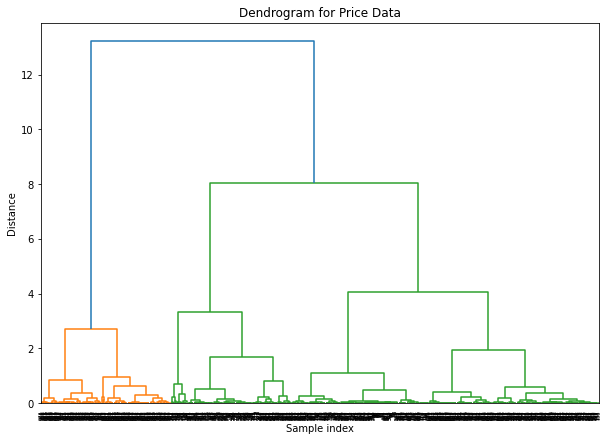

In [24]:
# Plot the dendrogram
plt.figure(figsize=(10, 7))
plt.title("Dendrogram for Price Data")
dendrogram(Z)
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.show()

In [25]:
from scipy.cluster.hierarchy import fcluster

# Form clusters by cutting the dendrogram at a certain height
max_d = 0.7  # max_d is the maximum distance between clusters
clusters = fcluster(Z, max_d, criterion='distance')

# Print cluster assignments
print(clusters)

[ 7  7  7  8 10  8 11  8 11  8 11  9 11  5 11  5 11 11 11 11 11 11 11 11
 11 11 11 11 11 11 11 11  6  7  7  7  7  6  7 10  6 10 13 10 10 10 10 10
 10 10 10 10 10 10  7  7 11  7  7  7  7  7  7  7  7  7  7  7  7  7  6  6
 11  7  7  7 11 11 11 11  7  7  9 11 11 11 11 11  6  7 10  7 10 11 11 11
 11 11 11 11 10  7 10 11 11 11 10 10 11 10 11 11 11 11 10 11 11 13 11 11
 11 11 11 10 13 13 10  9 13 12 13 13 11 13 11 13 13 13 13 10 13 11 13 13
 13 13 13 13 11 11 13 13 13 13 12 13  9 13 13 10 10 13 10 10  9 10 13 13
 10 10  6  6  6 10  6 12  5  6  5 11  7 11  8  8  8  8  6 10 11  8 10  5
 13  5  8 13 11 11 13 11 11  7 13  7  7 13  8  9  7  8  9  9 11  7  5  9
  9  7  7 10 10  7  6  5  5 10  7  7  7  7  9  8  7  7  6 10  8  7  7  8
  8  8  8  8  9  8  7  8  7  7  7  7  7  7  7  7 13 13 13 13  7  6  5  8
  7 13 13 13  9  7 13  6  7  7  7 13 13  7 10  9 13  7 10 13 13 10  7 10
 10 11 11 11 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 10
  9  7  9 10 10 13  6 13 10 10 10 10 10 10 10 10  6

see Deep Learning project at https://github.com/SimonDequidt/

## Dimensionality reduction

#### Principal-components-analysis-pca

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(df_knn)

# transform data to its first 2 components
x_pca = pca.transform(df_knn)
#df_knn.shape
x_pca.shape

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,1],c=data['Direction'],cmap='plasma')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

In [ ]:
pca.components_ #In this numpy matrix array, each row represents a principal component, and each column relates back to the original features
df_comp = pd.DataFrame(pca.components_,columns=df_knn.columns)
plt.figure(figsize=(12,6))
sns.heatmap(df_comp,cmap='plasma',)
#This heatmap and the color bar basically represent the correlation between the various feature and the principal component itself.

#### Autoencoders

see K-Nearest Neighbours - step 1 categorical variable

## Hyperparameters-optimisation-algoritms

### 1. Grid Search
**Description**: Exhaustively searches through a manually specified subset of the hyperparameter space.

**Pros**:
- Simple and easy to understand.
- Guarantees finding the optimal combination within the specified grid.

**Cons**:
- Computationally expensive, especially with a large number of hyperparameters or large ranges.
- Does not scale well with the dimensionality of the hyperparameter space.

### 2. Random Search
**Description**: Randomly samples hyperparameters from a specified distribution.

**Pros**:
- More efficient than grid search, particularly when some hyperparameters do not significantly influence performance.
- Can explore a larger hyperparameter space given the same computational budget.

**Cons**:
- No guarantee of finding the optimal hyperparameter combination.
- Performance can vary significantly between runs.

### 3. Bayesian Optimization
**Description**: Uses probabilistic models (e.g., Gaussian Processes) to model the objective function and select the most promising hyperparameters to evaluate next.

**Pros**:
- Efficiently balances exploration and exploitation.
- Can find good hyperparameters with fewer evaluations compared to grid and random search.

**Cons**:
- Computational overhead from maintaining and updating the probabilistic model.
- Performance can degrade with high-dimensional hyperparameter spaces.

### 4. Tree-structured Parzen Estimator (TPE)
**Description**: A specific type of Bayesian optimization that uses a tree-structured Parzen estimator to model the objective function.

**Pros**:
- Performs well with high-dimensional spaces.
- Can handle both categorical and continuous hyperparameters effectively.

**Cons**:
- Still more complex than grid or random search.
- Performance depends on the quality of the probabilistic model.

### 5. Genetic Algorithms
**Description**: Uses evolutionary techniques inspired by natural selection, iteratively improving a population of solutions.

**Pros**:
- Good for large and complex search spaces.
- Can escape local minima through mutation and crossover.

**Cons**:
- Computationally expensive.
- Requires careful tuning of the evolutionary parameters (e.g., mutation rate, crossover rate).

### 6. Hyperband
**Description**: Combines random search with early stopping to allocate more resources to promising configurations.

**Pros**:
- Efficiently uses computational resources by stopping poorly performing configurations early.
- Suitable for large-scale problems and deep learning.

**Cons**:
- Requires a mechanism to judge intermediate performance.
- May require tuning of the early stopping criteria.

### 7. Population-based Training (PBT)
**Description**: Optimizes hyperparameters and model parameters simultaneously by evolving a population of models.

**Pros**:
- Adapts hyperparameters dynamically during training.
- Particularly effective for deep learning and reinforcement learning.

**Cons**:
- Requires a large computational budget.
- Complex implementation and requires managing a population of models.

### 8. Sequential Model-based Algorithm Configuration (SMAC)
**Description**: Another form of Bayesian optimization, but uses random forests to model the objective function.

**Pros**:
- Efficient for complex and expensive objective functions.
- Works well with both continuous and categorical variables.

**Cons**:
- High computational overhead.
- Can be sensitive to the choice of hyperparameters for the optimization process itself.

### 9. Reinforcement Learning-based HPO
**Description**: Uses reinforcement learning techniques to navigate the hyperparameter space.

**Pros**:
- Can leverage past experiences to improve future hyperparameter searches.
- Suitable for dynamic and complex hyperparameter spaces.

**Cons**:
- Complex and computationally intensive.
- Requires careful design of the reward function and exploration strategy.

Each algorithm has its strengths and weaknesses, and the choice of algorithm often depends on the specific problem, computational resources, and the nature of the hyperparameter space.

## Data-base-management-sql-with-python

In [ ]:
import sqlite3 as sq3
import csv
import datetime as dt

Name: TICKER_Year-Month-Day_StartTime_EndTime_message_LEVEL.csv
    StartTime and EndTime give the theoretical beginning 
    and end time of the output file in milliseconds after         
    mid night. LEVEL refers to the number of levels of the 
    requested limit order book.


Columns:

    1.) Time:         
            Seconds after midnight with decimal 
            precision of at least milliseconds 
            and up to nanoseconds depending on 
            the requested period
    2.) Type:
            1: Submission of a new limit order
            2: Cancellation (Partial deletion 
               of a limit order)
            3: Deletion (Total deletion of a limit order)
            4: Execution of a visible limit order                    
            5: Execution of a hidden limit order
            7: Trading halt indicator                    
               (Detailed information below)
    3.) Order ID:     
            Unique order reference number 
            (Assigned in order flow)
    4.) Size:         
            Number of shares
    5.) Price:         
            Dollar price times 10000 
            (i.e., A stock price of USD91.14 is given 
            by 911400)
    6.) Direction:
            -1: Sell limit order
            1: Buy limit order

            Note: 
            Execution of a sell (buy) limit
            order corresponds to a buyer (seller) 
            initiated trade, i.e. Buy (Sell) trade.

In [ ]:
# Define the CREATE TABLE query
query = '''
CREATE TABLE intc_hf_events (
    Time TEXT,
    Type TEXT,
    "Order ID" INTEGER,
    Size INTEGER,
    Price REAL,
    Direction TEXT
)
'''

# Create a new SQLite database
data_connection = sq3.connect('intc_hf_events.db')
cursor = data_connection.cursor()

# Create a table
cursor.execute(query)

# Commit the changes and close the connection
data_connection.commit()
#data_connection.close()

In [ ]:
filename_message = "TSLA_2015-01-02_34200000_57600000_message_10.csv"

with open(filename_message, 'r') as csv_file:
    csv_reader = csv.reader(csv_file)
    
    # Skip header if present
    next(csv_reader, None)
    
    # Insert data into the table
    for row in csv_reader:
        cursor.execute('''
            INSERT INTO intc_hf_events (Time, Type, "Order ID", Size, Price, Direction)
            VALUES (?, ?, ?, ?, ?, ?)
        ''', (row[0], row[1], row[2], row[3], row[4], row[5]))

# Commit the changes and close the connection
data_connection.commit()
#data_connection.close()

In [ ]:
data_db = data_connection.execute('SELECT * FROM intc_hf_events').fetchall() 
data_db

In [ ]:
df_db = pd.DataFrame(data_db, columns = ["Time", "Type", "Order ID", "Size", "Price", "Direction"])
# df is symetrical and contains 2 times the data of a single day
df_analysis = df_db[:404985]
df_analysis

## Object-Oriented-Introduction

1. Class: A blueprint for creating objects.
2. Object: An instance of a class.
3. Attributes: Characteristics or properties of an object (variables).
4. Methods: Functions defined within a class that describe the behaviors of an object.
5. Inheritance: A way to form new classes using classes that have already been defined.
6. Encapsulation: Restricting access to certain components of an object to protect the object’s integrity.
7. Polymorphism: The ability to use a common interface for multiple forms (data types).

In [ ]:
# 1.Class
class statiscal_measures (object):
    #4. (special) Method - constructor
    def __init__(self, dataframe):
        self.dataframe = dataframe
        
    # 3. Attributes : dataframe, window_size
    def describe(self):
        return self.dataframe.describe()
    
    def mean(self):
        return self.dataframe.mean()
    
    def moving_average(self, window_size):
        return self.dataframe.rolling(window=window_size).mean()
    
    def cumulative_sum(self):
        return self.dataframe.cumsum()



In [ ]:
# 2.Object instance
stat_data = statiscal_measures(df_analysis)
stat_data

In [ ]:
class plot_fig (object):
    
    def __init__ (self, dataserie1, dataserie2):
        self.dataserie1 = dataserie1
        self.dataserie2 = dataserie2
        
    def plot_(self,dataserie1,dataserie2):
        # Create the first plot with the "Price" column
        fig, ax1 = plt.subplots(figsize=(10, 6))
        ax1.plot(dataserie1.index, dataserie1, color='blue', label='Price')
        ax1.set_xlabel('Index')
        ax1.set_ylabel('Price', color='blue')
        ax1.tick_params('y', colors='blue')

        # Create the second plot with the "Size" column
        ax2 = ax1.twinx()
        ax2.plot(dataserie2.index, dataserie2, color='green', label='Volume', alpha=0.5)
        ax2.set_ylabel('Volume (minus if selling)', color='green')
        ax2.tick_params('y', colors='green')

        # Add legends
        ax1.legend(loc='upper left')
        ax2.legend(loc='upper right')

        plt.title('Price and Volume over Index')
        plt.show()


In [ ]:
plot1 = plot_fig(df_analysis["Price"], group_5["Size"])
plot1.plot_(df_analysis["Price"], group_5["Size"])

In [ ]:
type_order = df_analysis.groupby("Type")
#direction_order = df_analysis.groupby("Direction")
#type_direction_order = df_analysis.groupby(["Type", "Direction"])

In [ ]:
for i in range(1, 6):
    plt.plot(type_order.get_group(str(i))["Size"].index,type_order.get_group(str(i))["Size"])

In [ ]:
group_5 = type_order.get_group(str(5))
stat_group_5 = statiscal_measures(group_5["Size"])
stat_group_5.cumulative_sum().plot()

plt.show()

In [ ]:
for i in range(1, 6):
    statiscal_measures(type_order.get_group(str(i))["Size"]).cumulative_sum().plot(label = f"Order {i}")
plt.legend()
plt.show()